In [1]:
import pandas as pd
import numpy as np
from sklearn import *
from catboost import CatBoostRegressor
import warnings as w
w.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# car_score = pd.read_csv("q1_result.csv")['0']

In [3]:
answer = pd.read_csv("../data/4.체감안전도_통계(2017~2019).csv")
answer2 = pd.read_csv("../data/4.체감안전도_통계(2017~2019).csv")

In [4]:
sub = pd.read_csv("../data/25.결과제출양식.csv")
pol_order = list(sub['경찰서명'])

for i in range(len(pol_order)):
    pol_order[i] = "jur_stn_"+pol_order[i]
    pol_order[i] = pol_order[i].replace(" ","")

In [126]:
tqq = pd.read_csv("q4_train.csv")#,index_col=0)

In [5]:
train_data = pd.read_csv("q4_train.csv")#,index_col=0)
train_data.reset_index(drop=True,inplace=True)
target_data = pd.read_csv("q4_target.csv")#,index_col=0)
y = train_data['raw_odder_q4']
target_data.reset_index(drop=True,inplace=True)

In [6]:
train_data = pd.get_dummies(train_data)
target_data = pd.get_dummies(target_data)

In [7]:
target_data['상반기'] =target_data['date_2020(상반기)']
del target_data['date_2020(상반기)'],target_data['date_2020(하반기)']

train_data['상반기'] = ( train_data['date_2018(상반기)'] | train_data['date_2019(상반기)'] )
# del train_data['date_2018(상반기)'],train_data['date_2018(하반기)'],train_data['date_2019(상반기)'],train_data['date_2019(하반기)']

In [8]:
preprocessing_col = pol_order + ['신고 건수(전체)', '신고 성별(남자)', '신고 성별(여자)', '신고 성별(불상)',
       '신고 성별(기타)', '접수긴급유형(긴급)', '접수긴급유형(중요)', '접수긴급유형(일반)', '접수긴급유형(민원)',
       '접수긴급유형(기타)', '발생요일(일)', '발생요일(월)', '발생요일(화)', '발생요일(수)', '발생요일(목)',
       '발생요일(금)', '발생요일(토)', '새벽(01~05)', '아침(06~10)', '점심(11~14)',
       '오후(15~18)', '저녁(19~21)', '심야(22~00)', 'pub_cnt', 'poor_num', 'age_합계',
       'age_15세미만', 'age_15~64세', 'age_65세이상', 'age_평균연령', 'sx_rate_합계',
       'sx_rate_15세미만', 'sx_rate_15~64세', 'sx_rate_65세이상', 'foreign_num',
       'cctv_cnt', 'bell_us', 'light_cnt', 'report_ratio','상반기']

In [9]:
train_data = train_data[preprocessing_col]
target_data = target_data[preprocessing_col]

In [10]:
X = train_data

In [11]:
target_data.sort_values(pol_order,ascending=False,inplace=True)
target_data.reset_index(drop=True,inplace=True)

In [12]:
idx_list = []
for i in answer.index:
    if '서' in answer.loc[i,'medium_category']:
        idx_list.append(i)

In [13]:
tar_sang = target_data[target_data['상반기']==1]
tar_ha = target_data[target_data['상반기']!=1]

tar_sang.reset_index(drop=True,inplace=True)
tar_ha.reset_index(drop=True,inplace=True)

In [14]:
for i in pol_order:
    del train_data[i],tar_sang[i],tar_ha[i]

In [15]:
model = CatBoostRegressor(iterations=400).fit(X, y)

Learning rate set to 0.056765
0:	learn: 3.6454731	total: 201ms	remaining: 1m 20s
1:	learn: 3.5934253	total: 302ms	remaining: 1m
2:	learn: 3.5466573	total: 398ms	remaining: 52.6s
3:	learn: 3.4965977	total: 497ms	remaining: 49.2s
4:	learn: 3.4548117	total: 596ms	remaining: 47.1s
5:	learn: 3.4118817	total: 698ms	remaining: 45.9s
6:	learn: 3.3602339	total: 795ms	remaining: 44.7s
7:	learn: 3.3234748	total: 897ms	remaining: 44s
8:	learn: 3.2928373	total: 1.09s	remaining: 47.3s
9:	learn: 3.2521959	total: 1.19s	remaining: 46.5s
10:	learn: 3.2001359	total: 1.38s	remaining: 49s
11:	learn: 3.1570850	total: 1.48s	remaining: 48s
12:	learn: 3.1111740	total: 1.58s	remaining: 47s
13:	learn: 3.0801797	total: 1.68s	remaining: 46.3s
14:	learn: 3.0474790	total: 1.78s	remaining: 45.8s
15:	learn: 3.0157744	total: 1.88s	remaining: 45.1s
16:	learn: 2.9930255	total: 1.97s	remaining: 44.5s
17:	learn: 2.9582329	total: 2.08s	remaining: 44.1s
18:	learn: 2.9312715	total: 2.18s	remaining: 43.7s
19:	learn: 2.9007516	

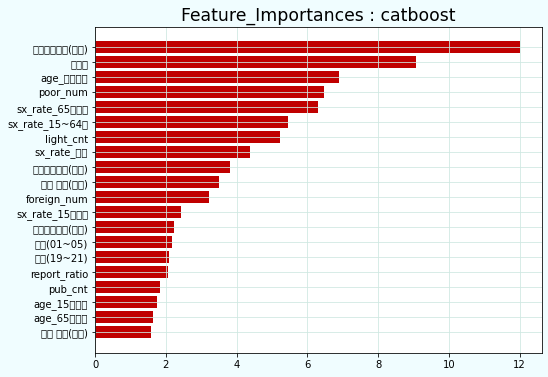

In [16]:
impotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,X.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split('.')[0].split('<')[-1]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#C00000")
plt.grid(color="#CFE8E1")

In [17]:
df = pd.DataFrame(list(zip(model.feature_importances_,X.columns)))
df.columns = ['weight','columns']
df.sort_values(['weight'],axis=0,ascending=False)

,weight,columns
5,12.023528,접수긴급유형(긴급)
39,9.072428,상반기
29,6.892067,age_평균연령
24,6.466863,poor_num
33,6.288339,sx_rate_65세이상
32,5.459011,sx_rate_15~64세
37,5.233558,light_cnt
30,4.381938,sx_rate_합계
9,3.816218,접수긴급유형(기타)
4,3.500756,신고 성별(기타)


In [154]:
# col_num = 37
# row=1
# print(tqq.loc[row,'jur_stn'])
# tester = (X.loc[row,:]).copy()
# target_col_value = X.columns[col_num]
# print("- 타겟 피쳐 : ",target_col_value,"\n- 값 : ", tester[target_col_value])
# print("- 기존 만족도 : ",y[row])
# print("- Feature Importance : ",model.feature_importances_[col_num])
# target_var_value = 1.1
# tester[target_col_value] = tester[target_col_value] * target_var_value
# print("- 수치 10% 증가 시 예측 만족도 : ",model.predict(np.array(tester)))
# print("* 변화량 : ",(model.predict(np.array(tester))-y[row]))

In [18]:
pred = (model.predict(tar_ha)* 0.85525 + model.predict(tar_sang) * 0.15525)

In [19]:
haban_data = answer2[answer2['large_category']=='2019 하반기(경찰서별)']['raw_odder_q4']
sangban_data = answer2[answer2['large_category']=='2019 상반기(경찰서별)']['raw_odder_q4']
haban_data.reset_index(drop=True,inplace=True)
sangban_data.reset_index(drop=True,inplace=True)

In [20]:
prediction = pd.Series(pred)
prediction = pd.Series(prediction)

In [21]:
result = (prediction * 0.9025 ) + (haban_data * 0.1025) + (sangban_data * 0.0525)

In [22]:
result.to_csv("q4_result.csv")